In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customers = pd.read_csv("Ecommerce Customers")

**Check the head of customers.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [278]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [279]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Training and Testing Data

let's go ahead and split the data into training and testing sets.
 Set a variable X equal to the numerical features of the customers dataset and a variable y equal to the "Yearly Amount Spent" column(label). 

In [4]:
y = customers['Yearly Amount Spent']

In [5]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

Import and Use model_selection.train_test_split from sklearn to split the data into training and testing sets.
we are going to Set test_size = 0.3 (30%) and random_state=101 (optional) but if you are going to code along its best to set it at the same number so our ouputs can be same.

TRAINING SETS

X_train = [features] 70% of datasets,

y_train = [features] 70% of datasets,

TEST SETS

X_test =  [label] 30% of datasets,

y_test =  [label] 30% of datasets


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Time to Train the Model

we are going to Import LinearRegression from sklearn.linear_model 

In [8]:
from sklearn.linear_model import LinearRegression

**we are creating an instance of a LinearRegression() model named lm.**

In [9]:
lm = LinearRegression()

 Train or fit lm on the training data splits.

In [10]:
lm.fit(X_train,y_train)

LinearRegression()

lets go ahead and print out the coefficients of the model

In [11]:
# The coefficients
print('The Coefficients:', lm.coef_)

The Coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, we are going to evaluate its predictions using our test data split.

We are going to Use lm.predict() method to predict off the X_test split set of the data.

In [12]:
predictions = lm.predict( X_test)

 We would Create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Y')

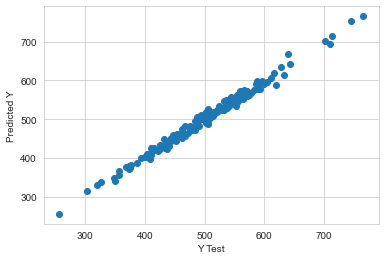

In [14]:
sns.set_style('whitegrid')
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


## Evaluating the Model


Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [15]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430817
MSE: 79.81305165097413
RMSE: 8.933815066978616


## Residuals

Exploring the residuals after getting a good fit 

**Plot a histogram of the residuals and make sure it looks normally distributed.**

We can use either seaborn distplot, or matplotlib plt.hist().

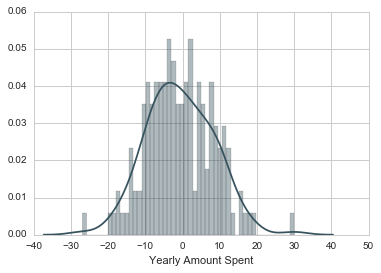

In [317]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
we are going to answer the question to our problem statement here.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

creating a dataframe of the coefficients

In [16]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
